In [15]:
using NetworkDiscovery
using POMDPs
using POMDPToolbox
using POMCP
rng = MersenneTwister(11);

In [16]:
p_intra = 0.3;
p_inter = 0.01;

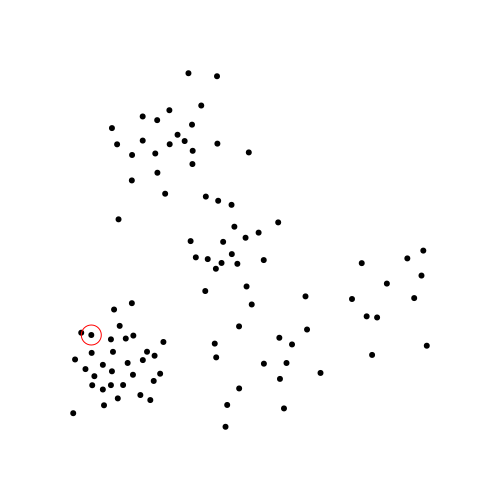

In [17]:
nw = generate_network(rng, 100, 5, p_intra, p_inter)

In [18]:
pomdp = generate_problem(rng, nw, 10, 1, 100.0, 10, 10, p_intra, p_inter)

CommunityAffiliationPOMDP(10,1,100.0,CommunityNetwork({100, 374} undirected graph,5,[3,3,5,4,2,2,3,4,5,1  …  5,5,4,2,1,1,3,2,3,1],10),Set{Int64}({47,32,2,16,39,82,60,35,83,65,22,23,31,78,13}),Set{Pair{Int64,Int64}}({edge 13 - 47,edge 16 - 22,edge 23 - 60,edge 32 - 60,edge 2 - 83,edge 31 - 82,edge 35 - 65,edge 39 - 78}),[23=>3,13=>2,35=>4,83=>3,2=>3,16=>3,22=>3,39=>3],0.3,0.01)

In [24]:
rollout_rng = MersenneTwister(3)
pomcp_rng = MersenneTwister(4)
rollout_policy = DiscoveryHeuristic(ProbeHighestDegree(true), GuessBasedOnNeighbors(rollout_rng))
solver = POMCPSolver(rollout_policy, 0.0, 100.0, 30, pomcp_rng, false, FullBeliefConverter(), 0)
policy = solve(solver, pomdp)

POMCPPolicy(CommunityAffiliationPOMDP(10,1,100.0,CommunityNetwork({100, 374} undirected graph,5,[3,3,5,4,2,2,3,4,5,1  …  5,5,4,2,1,1,3,2,3,1],10),Set{Int64}({47,32,2,16,39,82,60,35,83,65,22,23,31,78,13}),Set{Pair{Int64,Int64}}({edge 13 - 47,edge 16 - 22,edge 23 - 60,edge 32 - 60,edge 2 - 83,edge 31 - 82,edge 35 - 65,edge 39 - 78}),[23=>3,13=>2,35=>4,83=>3,2=>3,16=>3,22=>3,39=>3],0.3,0.01),POMCPSolver(DiscoveryHeuristic(ProbeHighestDegree(true),GuessBasedOnNeighbors(MersenneTwister(DSFMT_state(Int32[-1359582567,1073454075,1934390716,1073583786,-114685834,1073112842,-1913218479,1073122729,-73577195,1073266439  …  1226759590,1072980451,-1366384707,1073012992,1661148031,2121090155,141576524,-658637225,382,0]),Uint32[0x00000003]))),0.0,100.0,30,MersenneTwister(DSFMT_state(Int32[-1125970028,1072950084,1987879523,1073737715,1318759160,1073082403,-665387610,1073002484,775432869,1072783382  …  -1193370493,1072918807,503071495,1073572056,-1375397214,586182507,2038247757,798803726,382,0]),Uint32[

In [25]:
revealed = initial_belief(pomdp)

RevealedGraph(Set{Pair{Int64,Int64}}({edge 13 - 47,edge 16 - 22,edge 23 - 60,edge 32 - 60,edge 2 - 83,edge 31 - 82,edge 35 - 65,edge 39 - 78}),[[],[83],[],[],[],[],[],[],[],[]  …  [],[],[],[],[],[],[],[],[],[]],Set{Int64}({47,32,2,16,39,82,60,35,83,65,22,23,31,78,13}),[23=>3,13=>2,35=>4,83=>3,2=>3,16=>3,22=>3,39=>3],Set{Int64}({}),10,0.3,0.01,5)

In [26]:
# b = POMCPBeliefWrapper(revealed)
b = revealed
sim = HistoryRecorder(rng=rng, initial_state=nw, initial_belief=POMCPBeliefWrapper(b))
simulate(sim, pomdp, policy)

0.0

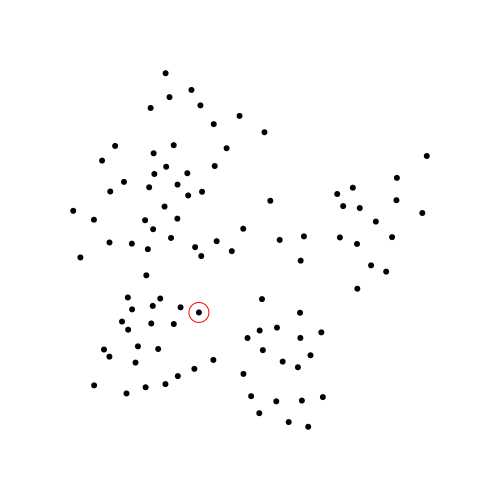

In [27]:
endnw = CommunityNetwork()
rand!(MersenneTwister(3), endnw, sim.belief_hist[end])
endnw

In [28]:
policy._tree_ref

RootNode(30,RevealedGraph(Set{Pair{Int64,Int64}}({edge 13 - 47,edge 16 - 22,edge 23 - 60,edge 32 - 60,edge 2 - 83,edge 31 - 82,edge 35 - 65,edge 39 - 78}),[[35,60,7,78,39,8,12,36,43,52  …  83,21,29,34,48,60,38,83,51,35],[83,32,11,20,36,52,64,75,78,65  …  3,12,26,33,34,58,62,72,78,97],[47,60,78,23,13,58,2,99,58,46  …  15,12,19,28,33,55,58,67,85,100],[47,47,65,7,31,35,99,51,68,1  …  26,12,72,12,62,45,74,69,51,32],[78,22,64,23,61,35,31,65,97,46,65,83,34,45,31,68],[32,7,82,61,31,97,23,98,68,62  …  47,26,68,23,30,3,23,37,51,90],[47,2,13,16,1,6,35,57,80,2  …  22,66,73,75,76,90,23,97,51,53],[65,13,32,1,65,97,90,38,60,97  …  97,60,47,58,40,69,12,69,17,23],[83,22,83,47,97,35,83,49,49,82  …  54,23,33,34,3,33,38,40,83,53],[39,78,60,39,32,47,23,82,7,47  …  98,58,65,22,90,60,33,40,33,74]  …  [39,65,64,60,72,38,99,38,58,97  …  22,32,54,62,33,63,26,35,40,41],[72,78,47,64,58,7,35,60,68,97,33,23,3,45,12,49,53,17,83],[32,16,78,82,82,17,72,83,78,23,61,65,83,3,33,65,61,74,53],[39,22,39,72,26,97,46,65,35,40,47,45,69,15],[82,97,78,35,99,56,32,35,69,90,98,46,30,83,74,51,22],[39,1,90,78,97,83,82,65,78,54,63,72,90,69,58,40,65,67,23],[65,2,16,26,50,53,58,67,70,76  …  17,24,20,68,7,41,51,54,58,36],[39,22,64,97,32,2,83,60,82,13  …  41,58,53,18,40,44,49,50,47,30],[32,31,82,32,2,64,61,64,3,4  …  53,68,71,86,20,57,66,67,90,61],[23,32,83,35,23,82,31,32,78,13  …  26,63,49,58,35,83,41,67,3,35]],Set{Int64}({47,32,2,16,39,82,60,35,83,65,22,23,31,78,13}),[23=>3,13=>2,35=>4,83=>3,2=>3,16=>3,22=>3,39=>3],Set{Int64}({}),10,0.3,0.01,5),[ProbeNode(82)=>ActNode(ProbeNode(82),1,0.0,RootNode(#= circular reference =#),{Neighborhood([12,18,33,34,52,81,89,95,99,31])=>ObsNode(Neighborhood([12,18,33,34,52,81,89,95,99,31]),1,RevealedGraph(Set{Pair{Int64,Int64}}({edge 82 - 95,edge 32 - 60,edge 13 - 47,edge 82 - 99,edge 82 - 33,edge 82 - 81,edge 82 - 89,edge 82 - 12,edge 23 - 60,edge 2 - 83,edge 16 - 22,edge 31 - 82,edge 35 - 65,edge 39 - 78,edge 82 - 34,edge 82 - 52,edge 82 - 18}),[[35,60,7,78,39,8,12,36,43,52  …  83,21,29,34,48,60,38,83,51,35],[83,32,11,20,36,52,64,75,78,65  …  3,12,26,33,34,58,62,72,78,97],[47,60,78,23,13,58,2,99,58,46  …  15,12,19,28,33,55,58,67,85,100],[47,47,65,7,31,35,99,51,68,1  …  26,12,72,12,62,45,74,69,51,32],[78,22,64,23,61,35,31,65,97,46,65,83,34,45,31,68],[32,7,82,61,31,97,23,98,68,62  …  47,26,68,23,30,3,23,37,51,90],[47,2,13,16,1,6,35,57,80,2  …  22,66,73,75,76,90,23,97,51,53],[65,13,32,1,65,97,90,38,60,97  …  97,60,47,58,40,69,12,69,17,23],[83,22,83,47,97,35,83,49,49,82  …  54,23,33,34,3,33,38,40,83,53],[39,78,60,39,32,47,23,82,7,47  …  98,58,65,22,90,60,33,40,33,74]  …  [39,65,64,60,72,38,99,38,58,97  …  22,32,54,62,33,63,26,35,40,41],[72,78,47,64,58,7,35,60,68,97,33,23,3,45,12,49,53,17,83],[32,16,78,82,82,17,72,83,78,23,61,65,83,3,33,65,61,74,53],[39,22,39,72,26,97,46,65,35,40,47,45,69,15],[82,97,78,35,99,56,32,35,69,90,98,46,30,83,74,51,22],[39,1,90,78,97,83,82,65,78,54,63,72,90,69,58,40,65,67,23],[65,2,16,26,50,53,58,67,70,76  …  17,24,20,68,7,41,51,54,58,36],[39,22,64,97,32,2,83,60,82,13  …  41,58,53,18,40,44,49,50,47,30],[32,31,82,32,2,64,61,64,3,4  …  53,68,71,86,20,57,66,67,90,61],[23,32,83,35,23,82,31,32,78,13  …  26,63,49,58,35,83,41,67,3,35]],Set{Int64}({33,47,52,32,2,81,89,16,39,82,60,35,83,34,65,22,95,23,31,78,13,99,12,18}),[23=>3,13=>2,35=>4,83=>3,2=>3,16=>3,22=>3,39=>3],Set{Int64}({82}),9,0.3,0.01,5),ActNode(#= circular reference =#),[ProbeNode(13)=>ActNode(ProbeNode(13),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(32)=>ActNode(ProbeNode(32),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(39)=>ActNode(ProbeNode(39),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(78)=>ActNode(ProbeNode(78),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(34)=>ActNode(ProbeNode(34),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(16)=>ActNode(ProbeNode(16),0,0.0,ObsNode(#= circular reference =#),Dict{Any,Any}()),ProbeNode(95)=>ActNode(ProbeNode(95),0,0.0,